In [2]:
import numpy as np
import pandas as pd
import random
from numpy.random import choice
import time

from order_book import OrderBook, OrderBookUtils

In [3]:
def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True) 
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

In [4]:
utils = OrderBookUtils()

In [5]:
def simulate_traders(order_book, duration=10, max_quantity=100, num_traders=10):
    order_id = 1
    start_time = time.time()
    midpoint_price = 100  # Initial midpoint price
    
    trader_biases = [(np.random.normal(0.2, 0.5) * 10) for _ in range(num_traders)]
    trader_choice_distrs = [softmax([np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 0.8)]) for _ in range(num_traders)]

    while time.time() - start_time < duration:
        for trader_id in range(num_traders):
            # Update midpoint price from the order book
            if order_book.price_history and order_book.price_history[-1]['midpoint'] is not None:
                midpoint_price = order_book.price_history[-1]['midpoint']

            # Simulate trader behavior
            trader_bias = np.random.uniform(-1, 1) * trader_biases[trader_id] # Each trader may have a slight bias
            side = np.random.choice(['buy', 'sell', 'none'], p=trader_choice_distrs[trader_id])
            if side == 'none':
                continue
            
            # Adjust price deviation to reflect market trends
            # price_deviation = np.random.normal(trader_bias * 5, 5)
            center = midpoint_price + (trader_bias  * (1 if side == 'sell' else -1))
            std = np.random.uniform(0, 1)
            
            price = np.random.normal(center, std)

            # Randomize quantity based on trader type
            quantity = np.random.randint(1, max_quantity // (1 + abs(trader_bias)))

            # Add order to the book
            order_book.add_order(order_id=order_id, side=side, price=price, quantity=quantity)
            order_id += 1

        # Recompute market price
        order_book.compute_market_price()
        # utils.plot_depth_chart(order_book=order_book, band_length=0.2)
        # Sleep to simulate real-time updates
        time.sleep(0.1)

    order_book.display()

In [6]:
ob = OrderBook()
simulate_traders(order_book=ob)

Attempting to match: Buy Order 3 @ 99.2197670607993, Quantity: 20 | Sell Order 1 @ 98.75368705634486, Quantity: 6
Matched buy order 3 with sell order 1 | (6) @ $98.75368705634486
Attempting to match: Buy Order 3 @ 99.2197670607993, Quantity: 14 | Sell Order 2 @ 106.53712946181687, Quantity: 9
No match found. Exiting matching loop.
Attempting to match: Buy Order 4 @ 100.86930778643382, Quantity: 6 | Sell Order 2 @ 106.53712946181687, Quantity: 9
No match found. Exiting matching loop.
Attempting to match: Buy Order 4 @ 100.86930778643382, Quantity: 6 | Sell Order 5 @ 96.9590798456566, Quantity: 8
Matched buy order 4 with sell order 5 | (6) @ $96.9590798456566
Attempting to match: Buy Order 3 @ 99.2197670607993, Quantity: 14 | Sell Order 5 @ 96.9590798456566, Quantity: 2
Matched buy order 3 with sell order 5 | (2) @ $96.9590798456566
Attempting to match: Buy Order 3 @ 99.2197670607993, Quantity: 12 | Sell Order 2 @ 106.53712946181687, Quantity: 9
No match found. Exiting matching loop.
Att

In [7]:
print([m for m in ob.price_history])

[{'midpoint': None, 'last_trade': 106.53712946181687, 'vwap': 99.2035609324884}, {'midpoint': 100.28052932200842, 'last_trade': 100.70246487885136, 'vwap': 99.55197172215954}, {'midpoint': 100.42238801722812, 'last_trade': 99.48445367074775, 'vwap': 100.02148577297126}, {'midpoint': 99.8883141216773, 'last_trade': 99.91803447818911, 'vwap': 99.94648259855872}, {'midpoint': 99.78769924809166, 'last_trade': 99.92040547969903, 'vwap': 99.48882244855282}, {'midpoint': 100.51048661145882, 'last_trade': 96.55987831085055, 'vwap': 99.77720132493499}, {'midpoint': 100.61411059821286, 'last_trade': 100.98618226929078, 'vwap': 99.81321746090823}, {'midpoint': 102.72797112407648, 'last_trade': 101.45079054570598, 'vwap': 100.16854795951329}, {'midpoint': 102.75989951685943, 'last_trade': 103.09783022941897, 'vwap': 100.28469311767523}, {'midpoint': 102.28196514515872, 'last_trade': 101.37213021069297, 'vwap': 101.10453037152256}, {'midpoint': 102.64196714712668, 'last_trade': 104.71054622836341, 

In [8]:
import matplotlib.pyplot as plt

In [9]:
midpoints = [m['midpoint'] for m in ob.price_history]
vwap = [m['vwap'] for m in ob.price_history]
lt_price = [m['last_trade'] for m in ob.price_history]
spreads = [s for s in ob.spread_history]
X = np.arange(len(midpoints))

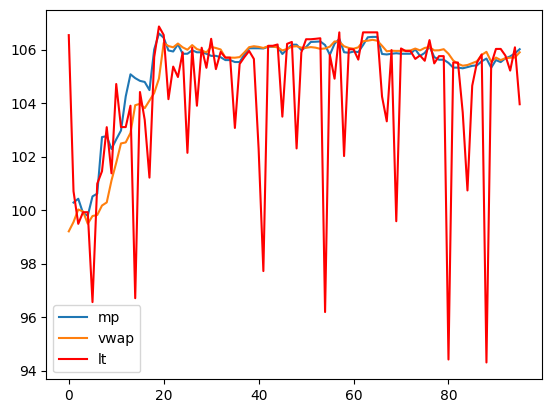

In [10]:
plt.plot(X, midpoints, label='mp')
plt.plot(X, vwap, label='vwap')
plt.plot(X, lt_price, label='lt', color='red')
plt.legend()
plt.show()

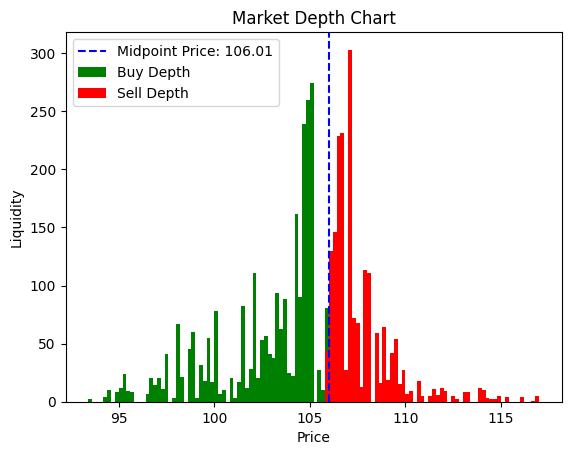

In [11]:
utils.plot_depth_chart(order_book=ob, band_length=0.2)

In [12]:
ob.submit_market_order(order_id=-2, side='buy', quantity=500)

Attempting to match: Buy Order 644 @ 105.94156952856412, Quantity: 71 | Sell Order 548 @ 106.75148408857024, Quantity: 5
No match found. Exiting matching loop.


In [13]:
ob.submit_market_order(order_id=-2, side='buy', quantity=500)

Attempting to match: Buy Order 644 @ 105.94156952856412, Quantity: 71 | Sell Order 348 @ 107.22371316679498, Quantity: 73
No match found. Exiting matching loop.


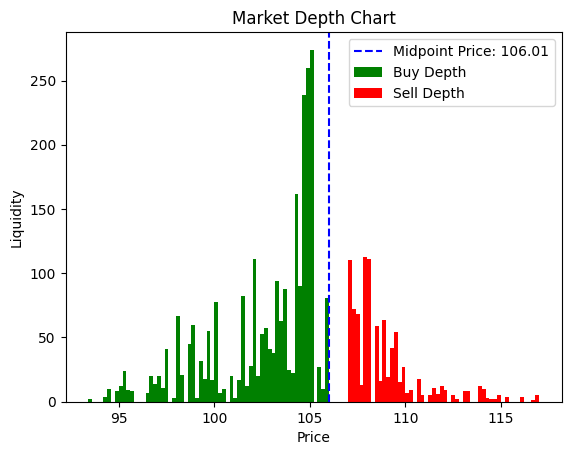

In [14]:
utils.plot_depth_chart(order_book=ob, band_length=0.2)